# COVID-19 ANALYSIS (QUANTITATIVE MODELLING)

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sb
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Importing dataset 

In [2]:
dataset = pd.read_csv(r"d:\Users\Rika Banerjee\Downloads\covid19.csv")
dataset= dataset.drop(['Sno'],axis=1)
dataset.head()

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,30/01/20,Kerala,1,0,0,0
1,31/01/20,Kerala,1,0,0,0
2,01/02/20,Kerala,2,0,0,0
3,02/02/20,Kerala,3,0,0,0
4,03/02/20,Kerala,3,0,0,0


In [3]:
dataset_sum= dataset.sum(axis=1)
dataset['total cases'] = dataset_sum
dataset

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,total cases
0,30/01/20,Kerala,1,0,0,0,1
1,31/01/20,Kerala,1,0,0,0,1
2,01/02/20,Kerala,2,0,0,0,2
3,02/02/20,Kerala,3,0,0,0,3
4,03/02/20,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...
265,21/03/20,Jammu and Kashmir,4,0,0,0,4
266,21/03/20,Ladakh,13,0,0,0,13
267,21/03/20,Uttar Pradesh,23,1,9,0,33
268,21/03/20,Uttarakhand,3,0,0,0,3


In [4]:
new_dataset = dataset.drop(['State/UnionTerritory','ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths'],axis = 1)
new_dataset

,Date,total cases
0,30/01/20,1
1,31/01/20,1
2,01/02/20,2
3,02/02/20,3
4,03/02/20,3
...,...,...
265,21/03/20,4
266,21/03/20,13
267,21/03/20,33
268,21/03/20,3


##### New dataframe 'data' grouped by dates

In [5]:
dataset_group= new_dataset.groupby(['Date'],sort = False)['total cases'].sum()
data = pd.DataFrame(dataset_group)
data['Date'] = data.index
data.reset_index(drop = True, inplace = True)
data

,total cases,Date
0,1,30/01/20
1,1,31/01/20
2,2,01/02/20
3,3,02/02/20
4,3,03/02/20
5,3,04/02/20
6,3,05/02/20
7,3,06/02/20
8,3,07/02/20
9,3,08/02/20


##### Total number of cases on 04/03/2020 is 31

### Visualization of the new data 

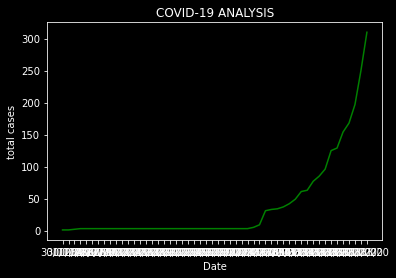

In [7]:
plt.plot(data['Date'],data['total cases'],color = 'green')
plt.xlabel('Date')
plt.ylabel('total cases')
plt.title('COVID-19 ANALYSIS')
plt.rcParams['axes.facecolor']='white'
plt.style.use('dark_background')
plt.show()

#### Computation of the rate of interest on each day from 04/03/2020 to 21/03/2020

In [8]:
a = data['total cases']
R = []
for i in range(0,len(a)-1):
  l = (a[i+1] - a[i]) / a[i]
  R.append(l)
R = pd.DataFrame(R)
R.rename(columns = {0:'Rate'}, inplace = True) 
R

,Rate
0,0.000000
1,1.000000
2,0.500000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,0.000000


In [9]:
r = R[34:]
r

,Rate
34,0.064516
35,0.030303
36,0.088235
37,0.135135
38,0.166667
39,0.244898
40,0.032787
41,0.222222
42,0.103896
43,0.129412


In [10]:
r = r.mean(axis =0)
r

Rate    0.148148
dtype: float64

#### The Predicted forecast of the model that shows an exponential trend

In [11]:
# According to the problem
P_0 = 31   # initial value
t = 26     # total number of cases as on 4th March 2020
#Predicted value
P_t =  P_0 * (np.exp(r*t))
P_t

Rate    1459.481028
dtype: float64